In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings # Pour éviter les warnings
warnings.filterwarnings('ignore')

c:\Users\KHALFALLAH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Importation du dataset 
data = pd.read_csv('creditcard.csv', sep=',')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Exploration initiale**

In [31]:
# Dimension du dataset
data.shape

(284807, 31)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.Class.unique()

array([0, 1], dtype=int64)

In [5]:
# Recodage de la variable cible en type qualitatif
data['Class'].replace([1,0], ['fraudée','non_fraudée'], inplace =True)

In [6]:
# Vérification du recodage de la variable cible
data.Class.unique()

array(['non_fraudée', 'fraudée'], dtype=object)

In [7]:
data.dtypes.value_counts()

float64    30
object      1
dtype: int64

In [13]:
# Pourcentages des valeurs manquantes de chacune des variables de notre dataset
(data.isna().sum()/data.shape[0]).sort_values(ascending = False)*100

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

Notre dataset ne comporte aucune valeur maquante.

In [14]:
#Analyse des lignes dupliquées 
data.duplicated().sum()

1081

# **Analyse exploratoire**

In [7]:
# Séléction des variables quantitatives
numCols = data.select_dtypes(include = 'number').columns.tolist()

### **Analyse univariée**

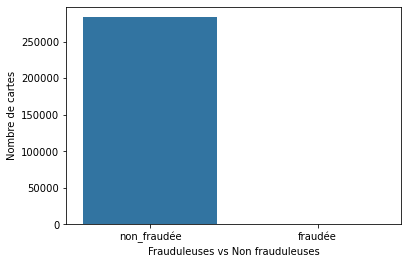

non_fraudée    0.998333
fraudée        0.001667
Name: Class, dtype: float64


In [15]:
# Distribution de la variable cible
sns.countplot(x = 'Class',data = data)

plt.xlabel('Frauduleuses vs Non frauduleuses')
plt.ylabel("Nombre de cartes")

plt.show()

print(data['Class'].value_counts(normalize =True))

On peut remarquer que 99% des cartes ne sont pas frauduleuses. Donc,nos classes sont très déséquilibrées. 
On s'attend alors à utiliser plus-tard, des métriques comme F1-Score, Précision ou Recall pour évaluer la performance de notre modèle.

In [16]:
# Audit de l'unique variable qualitative Class
data.Class.describe()

count          283726
unique              2
top       non_fraudée
freq           283253
Name: Class, dtype: object

In [17]:
# Audit des variables numériques
data[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Le résumé ci-dessus nous fait savoir que le montant maximal est de 25691... Toutefois, il est à signaler que le dataset a subi une transformation PCA.

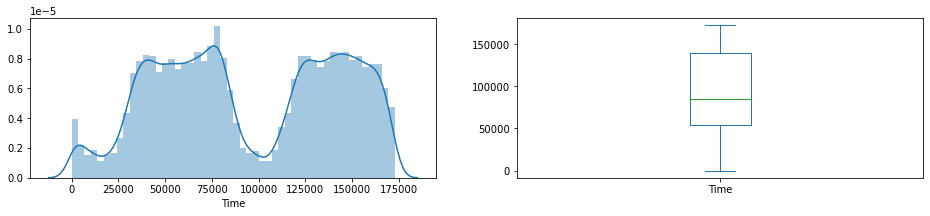

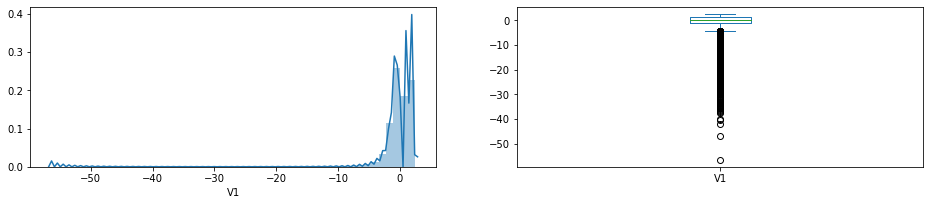

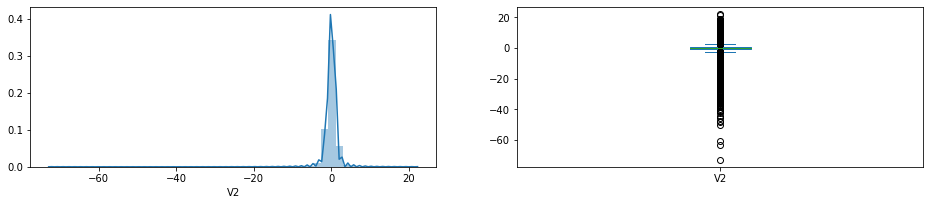

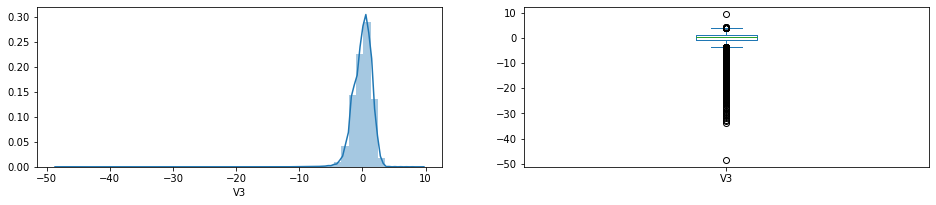

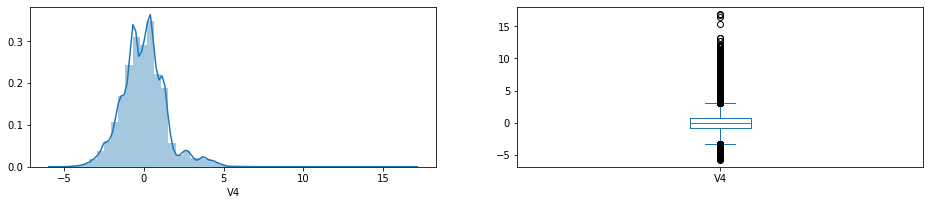

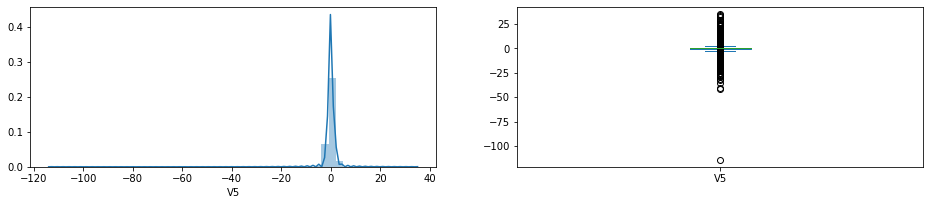

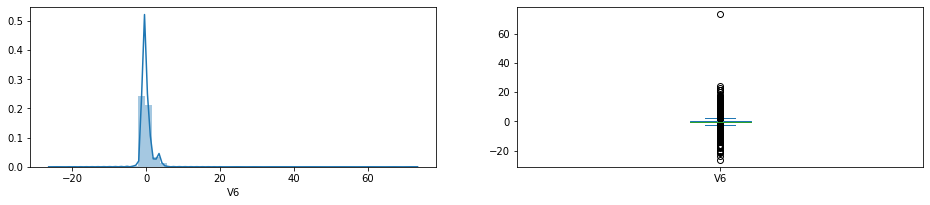

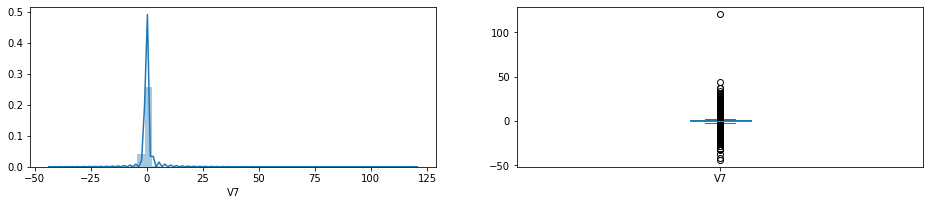

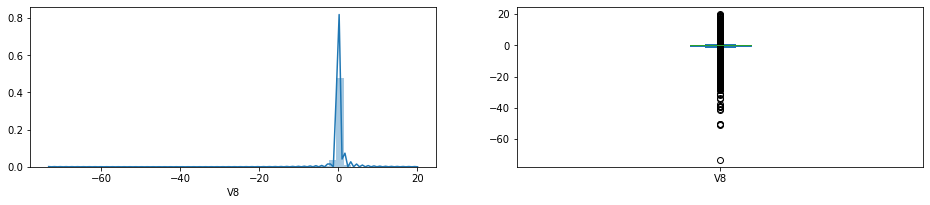

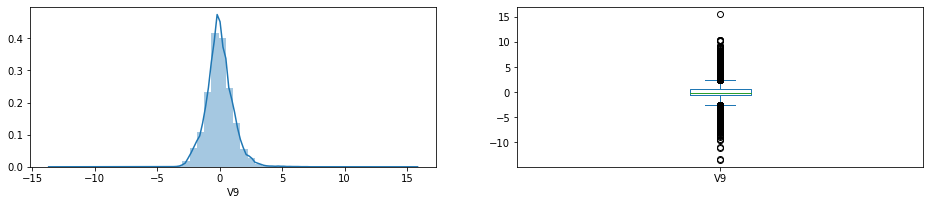

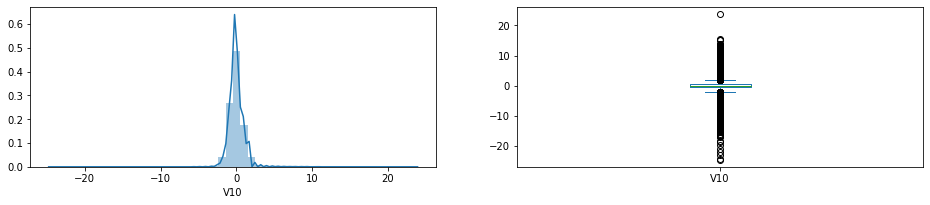

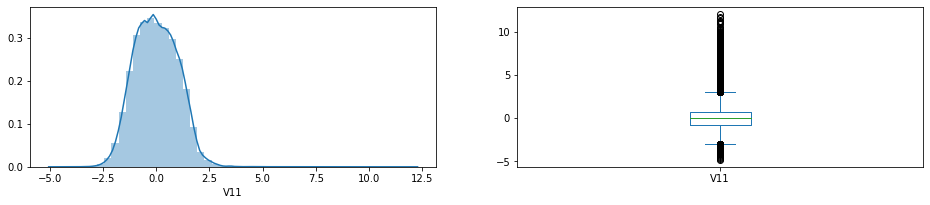

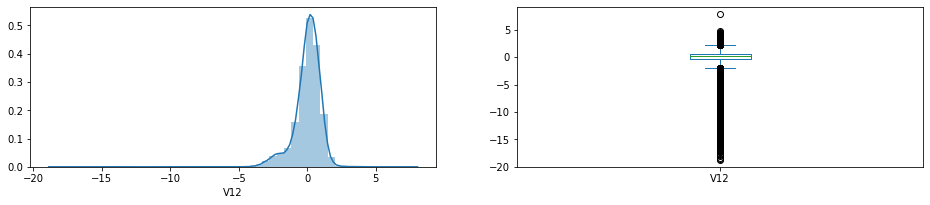

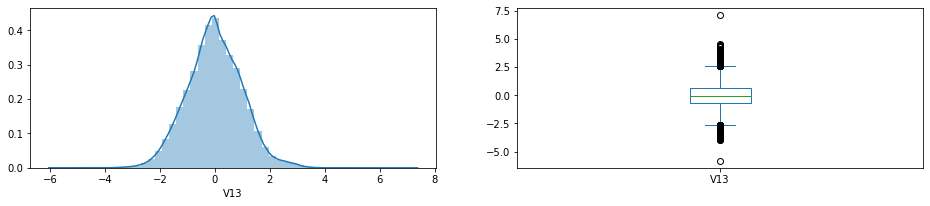

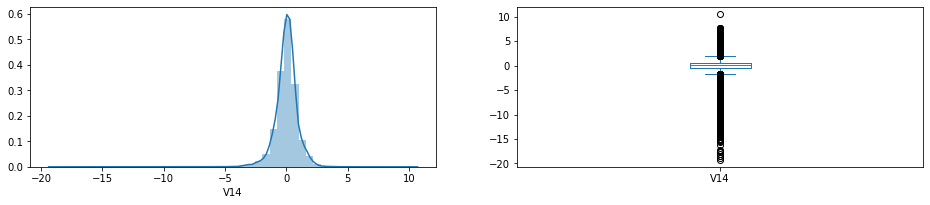

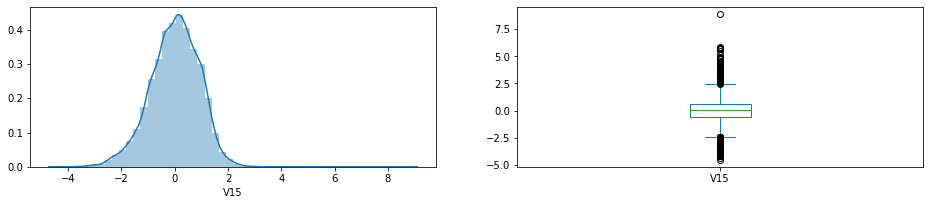

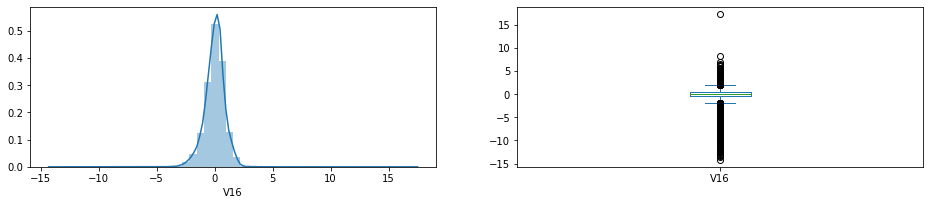

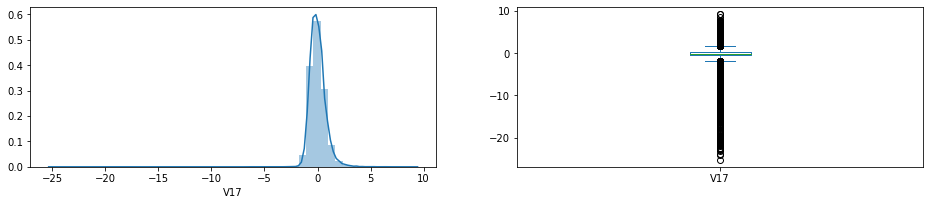

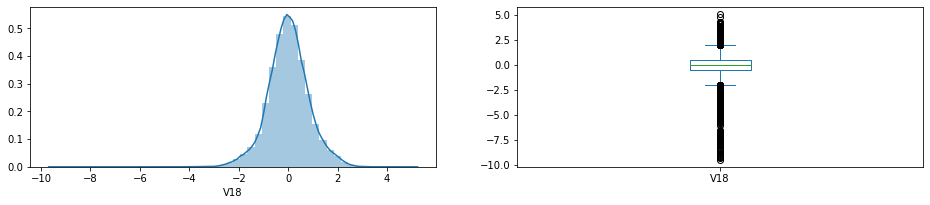

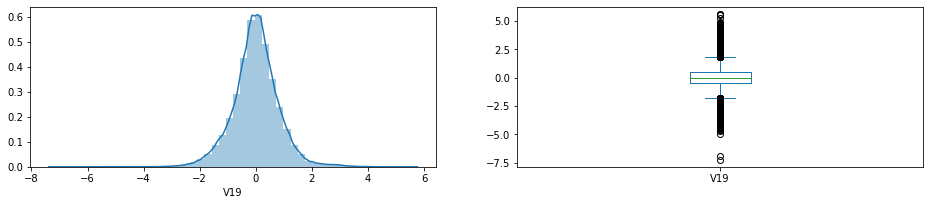

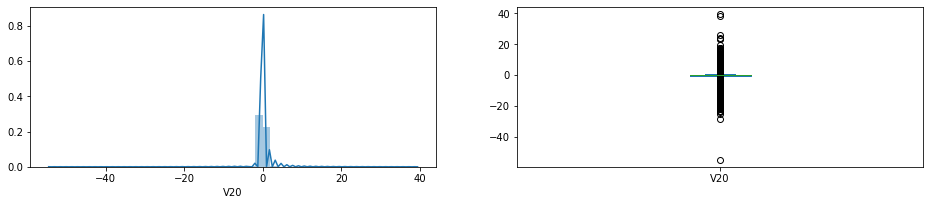

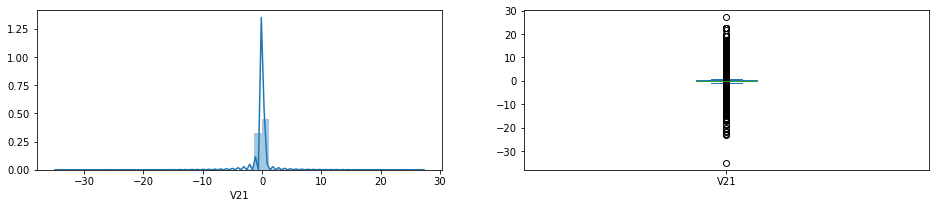

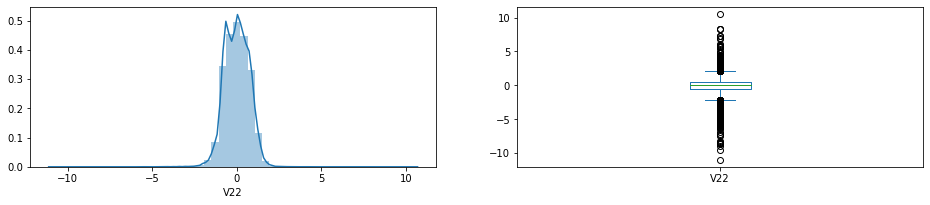

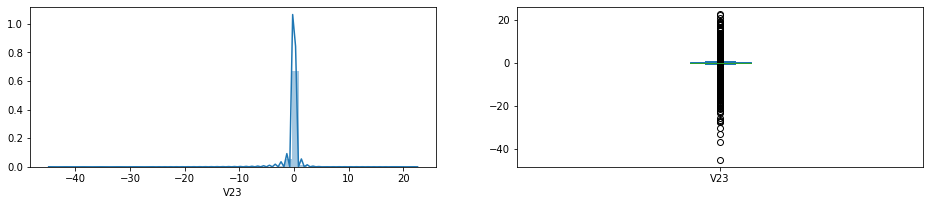

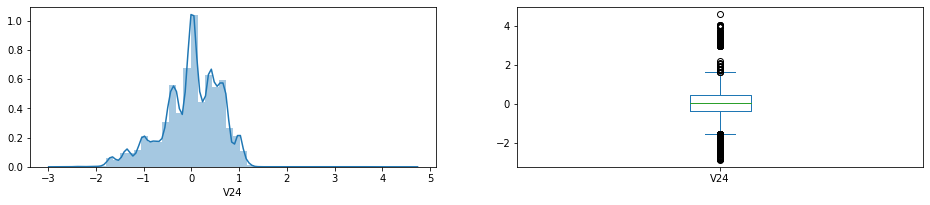

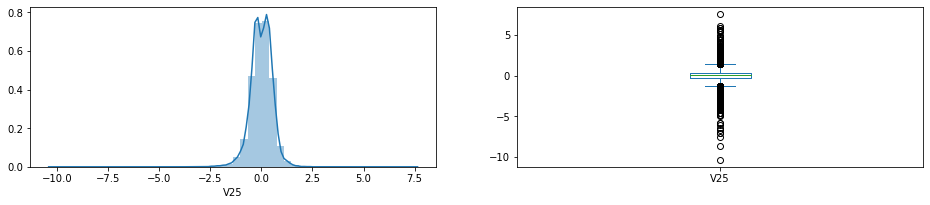

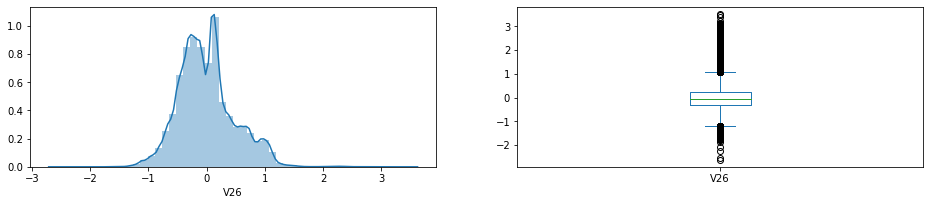

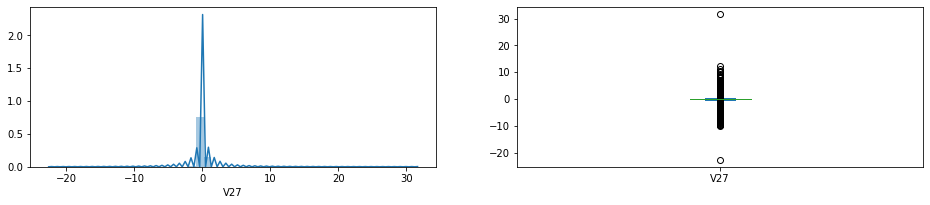

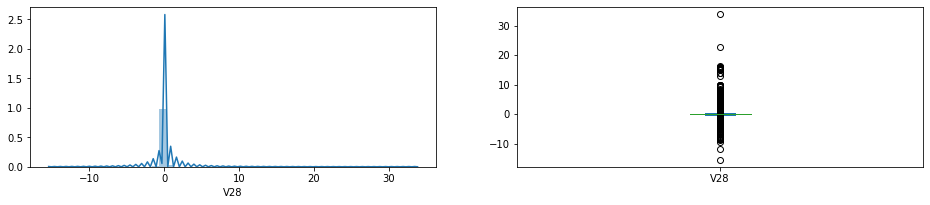

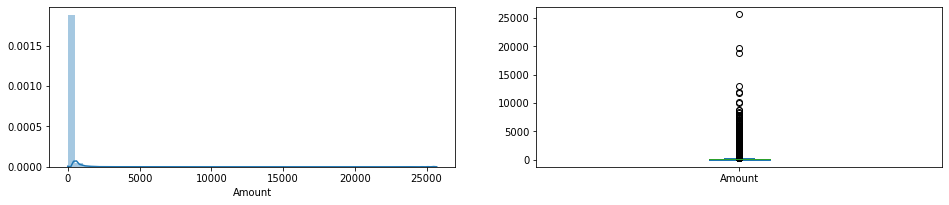

In [18]:
#Distribution des variables quantitatives
for col in numCols:
    plt.subplot(321)
    sns.distplot(data[col])

    plt.subplot(322)
    data[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

On peut remarquer que toutes les variables numériques sont asymétriques, de plus elles renferment beaucoup de valeurs abérrantes.

### **Analyse bivariée**

In [20]:
data.Class.value_counts()

non_fraudée    283253
fraudée           473
Name: Class, dtype: int64

In [21]:
# Création de sous ensemble de clients possédant des cartes frauduleuses et non frauduleuses.
Fraude = data[data['Class']== 'fraudée']
Non_Fraude = data[data['Class']== 'non_fraudée']

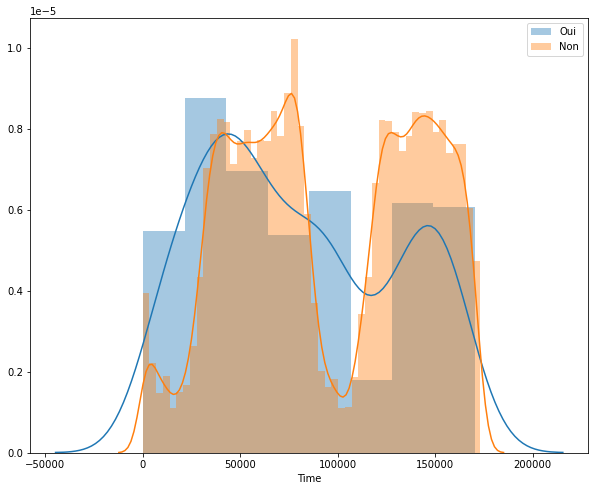

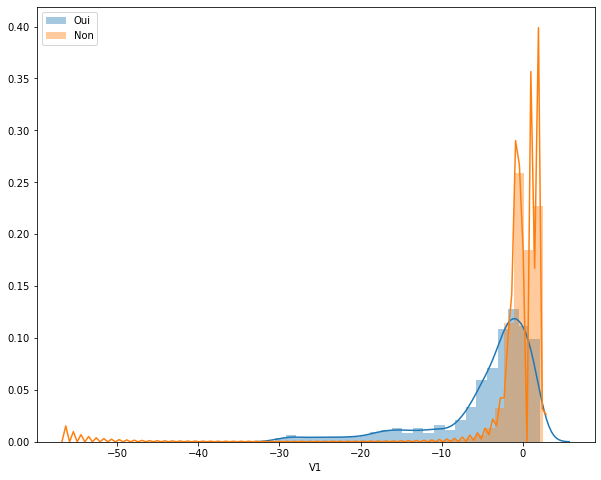

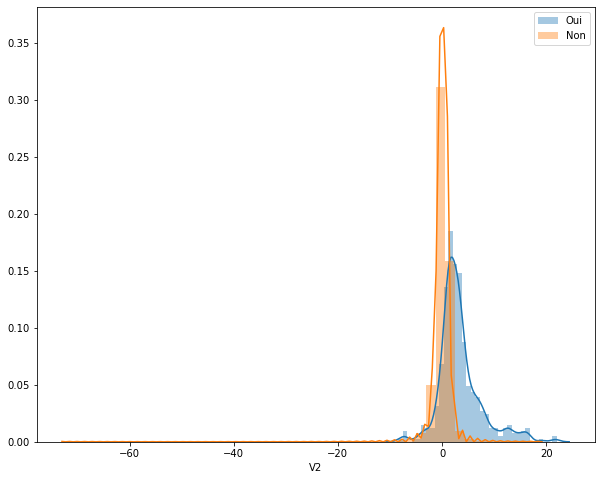

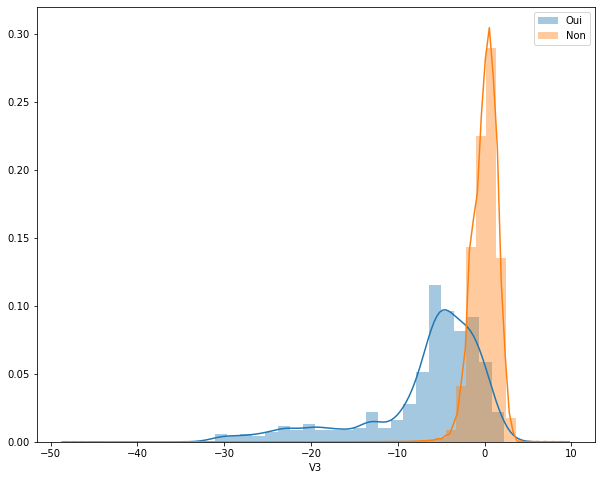

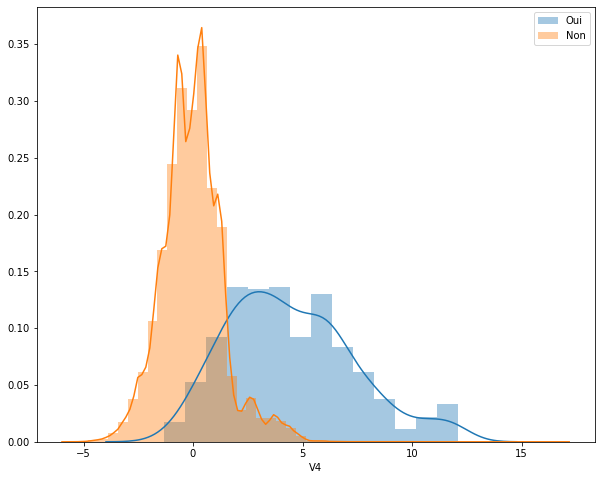

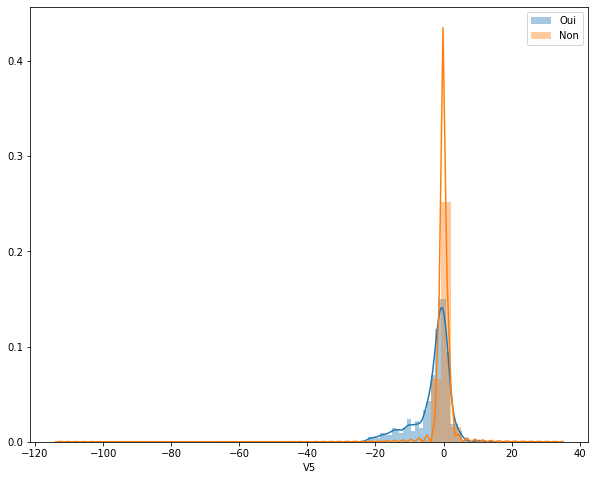

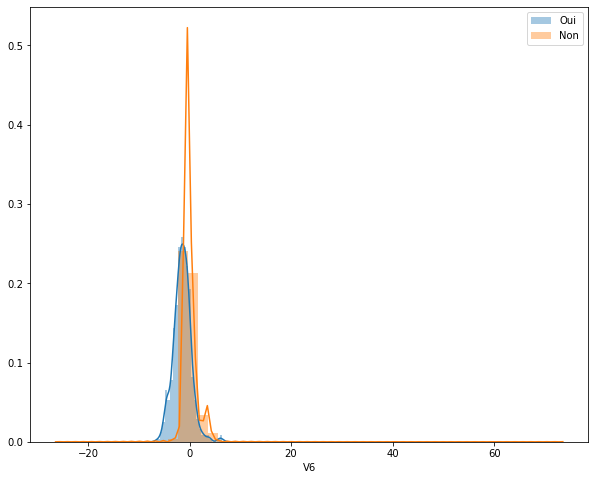

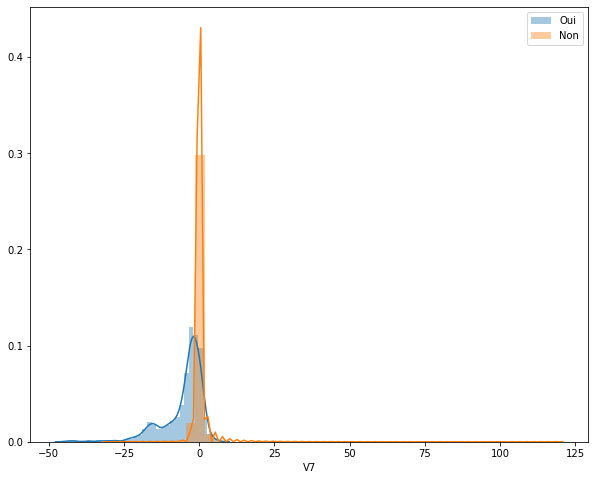

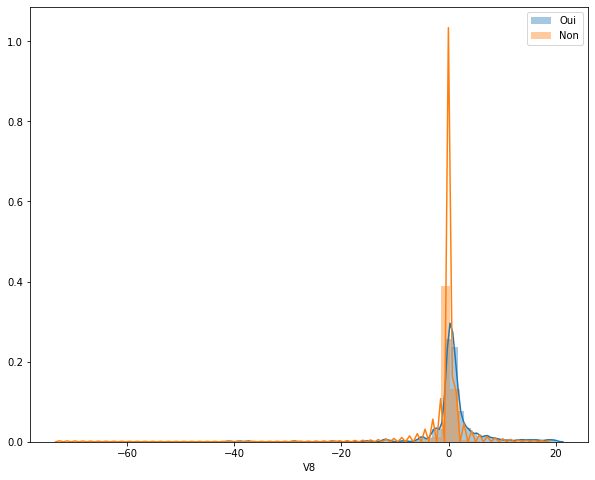

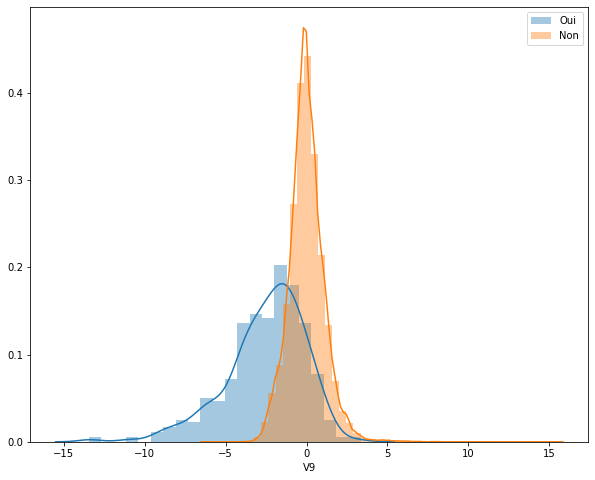

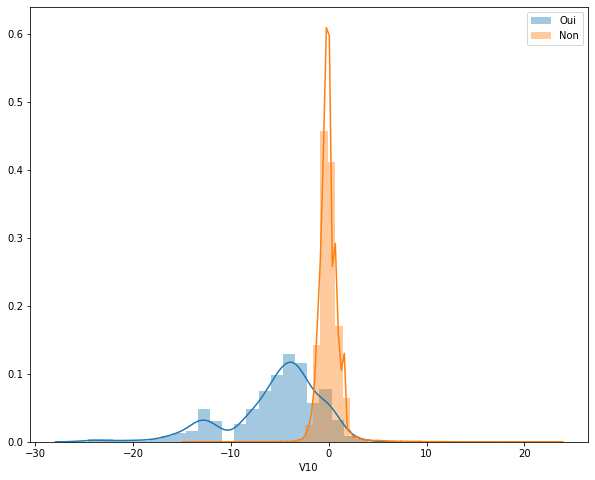

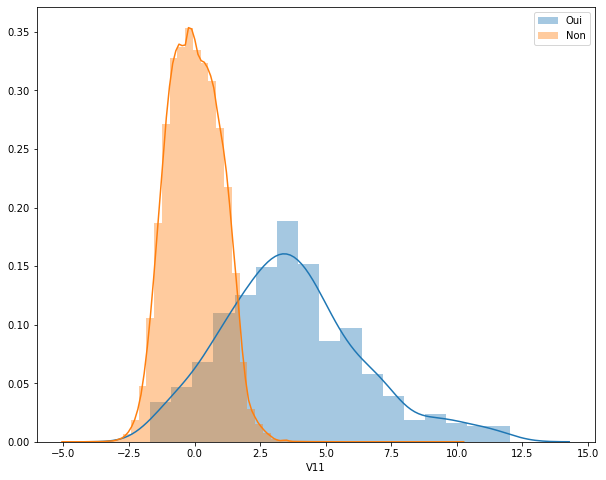

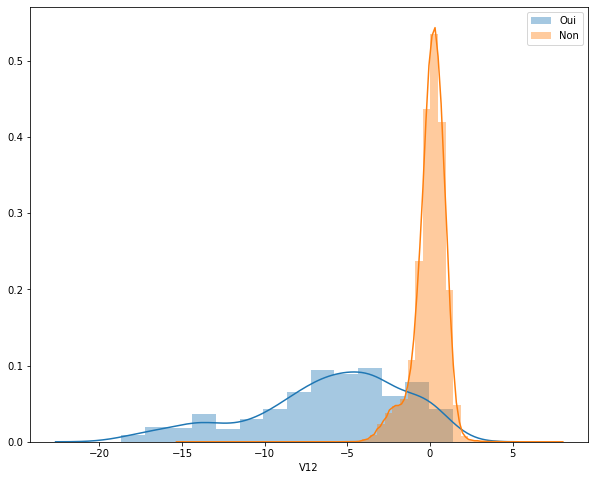

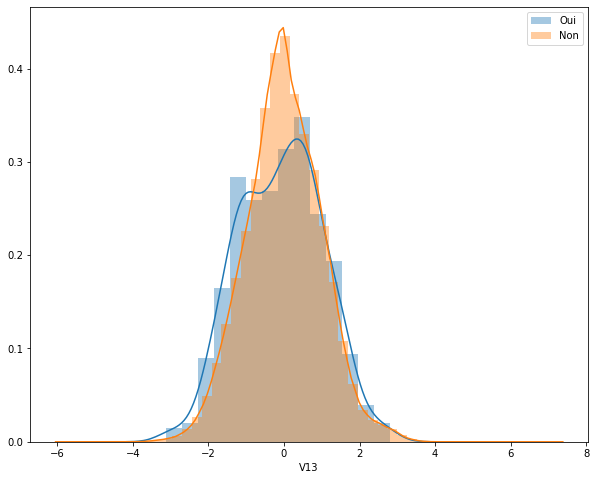

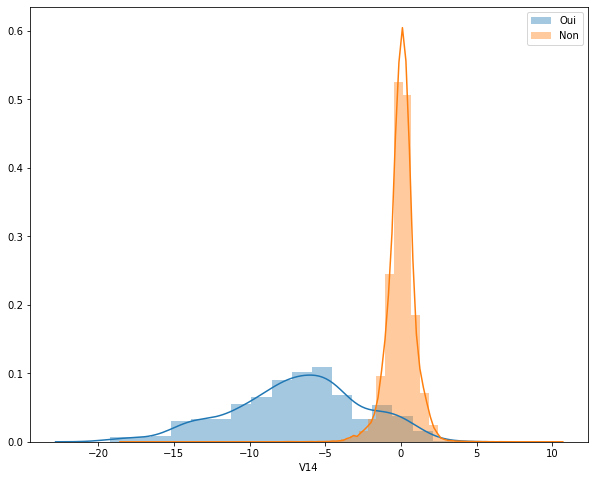

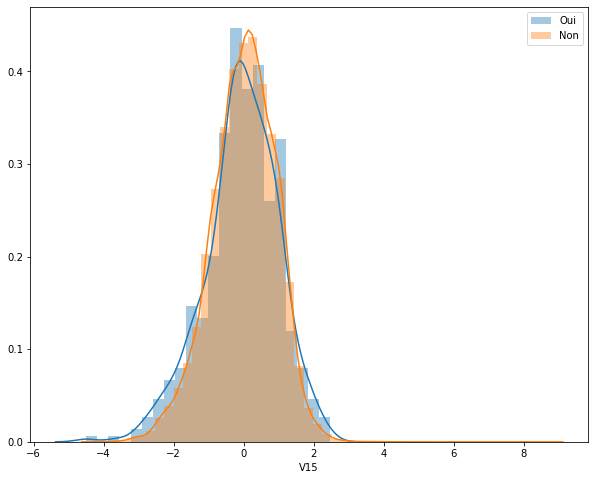

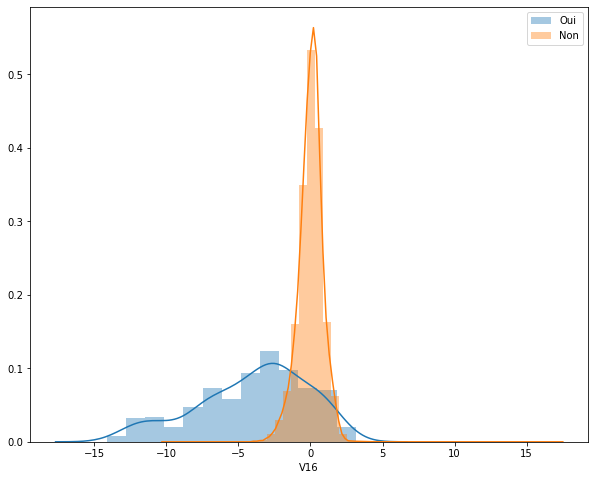

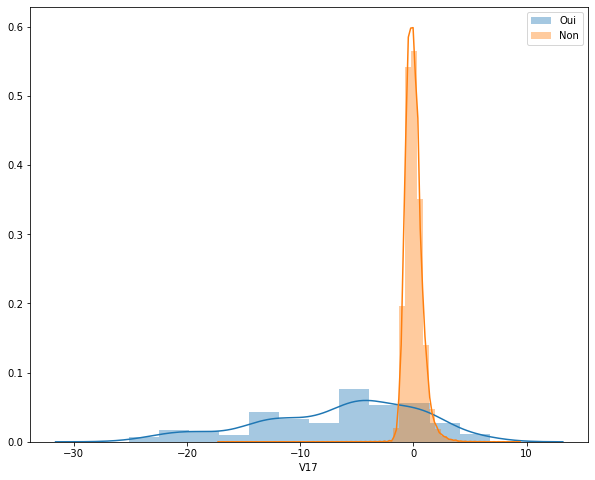

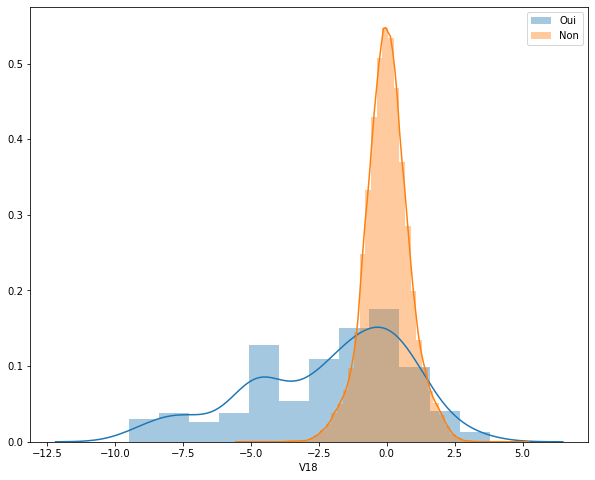

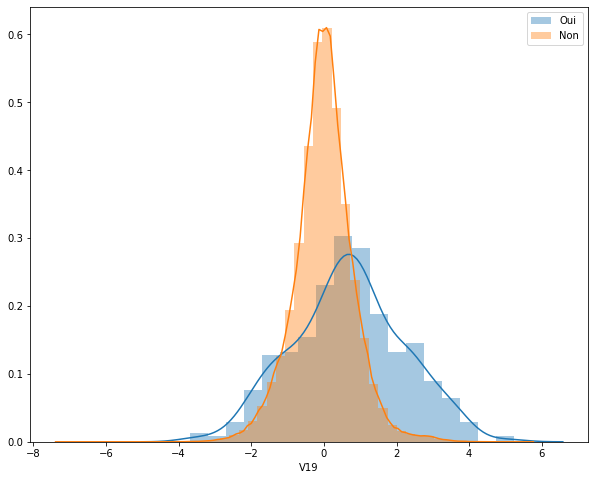

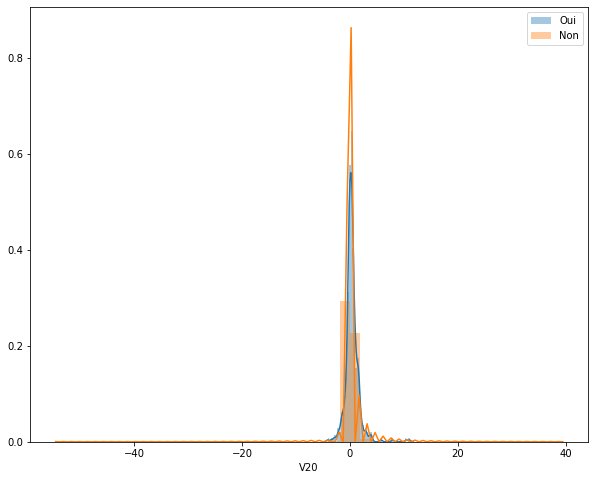

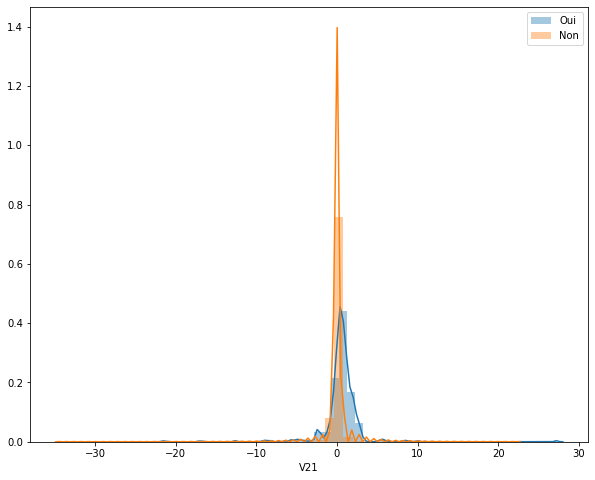

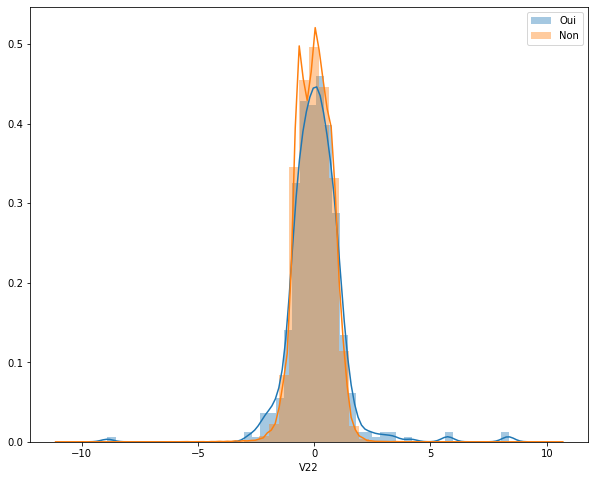

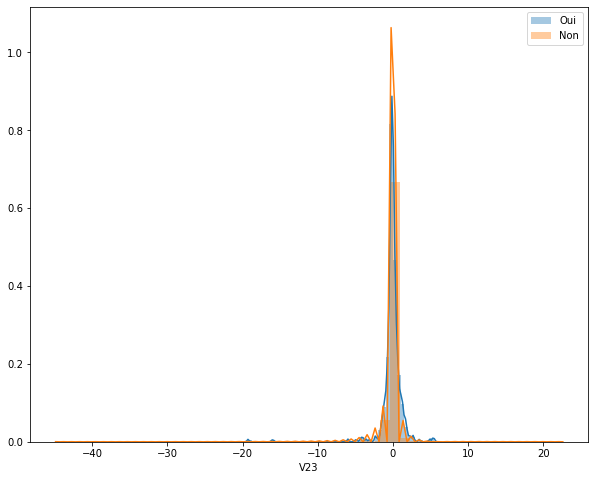

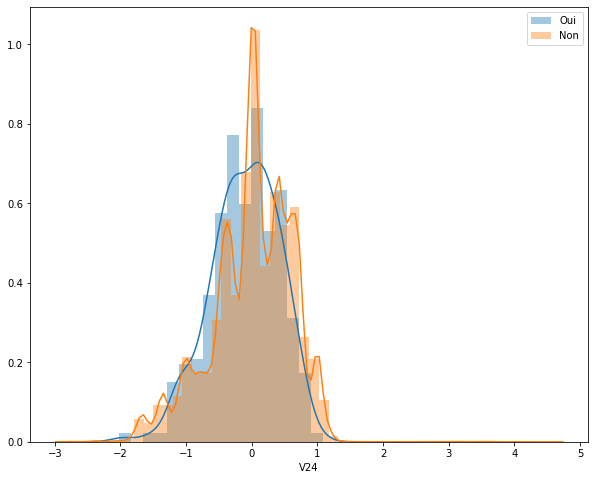

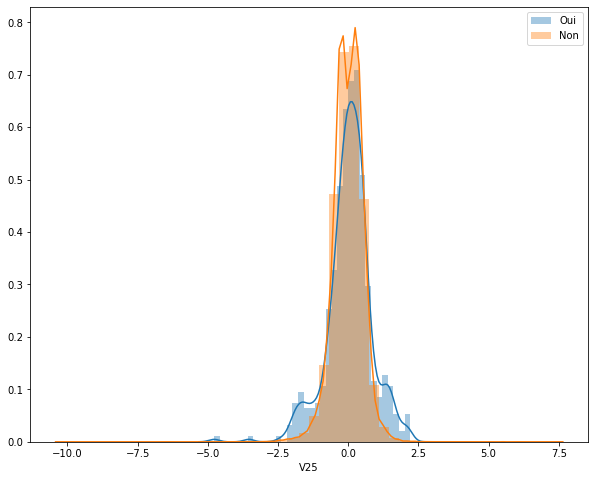

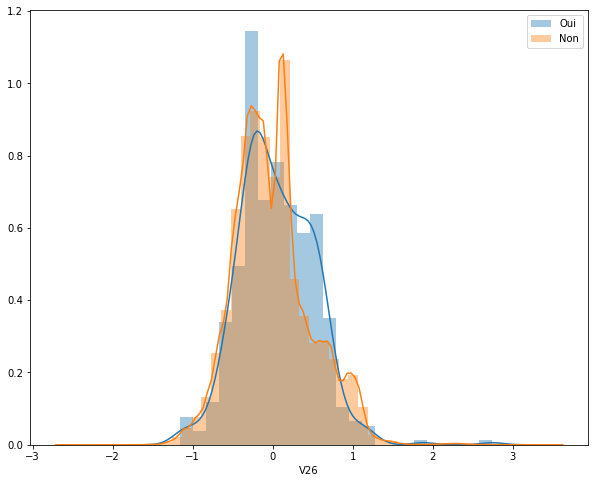

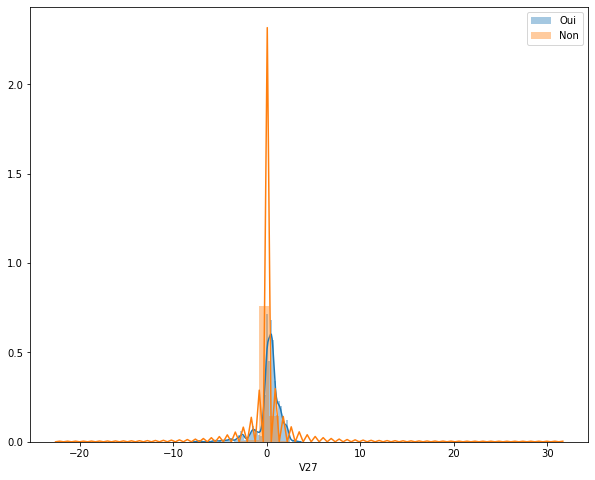

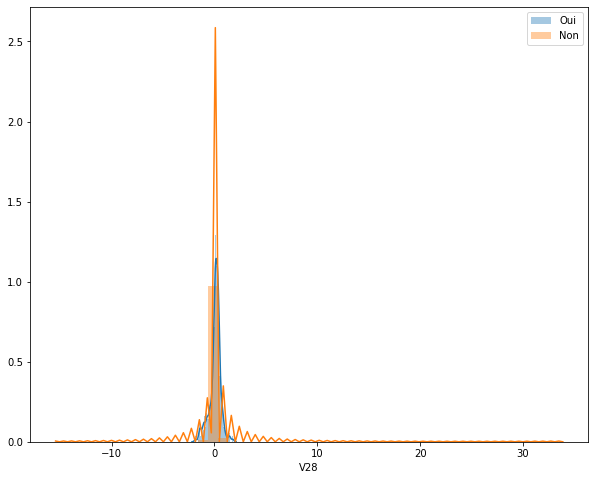

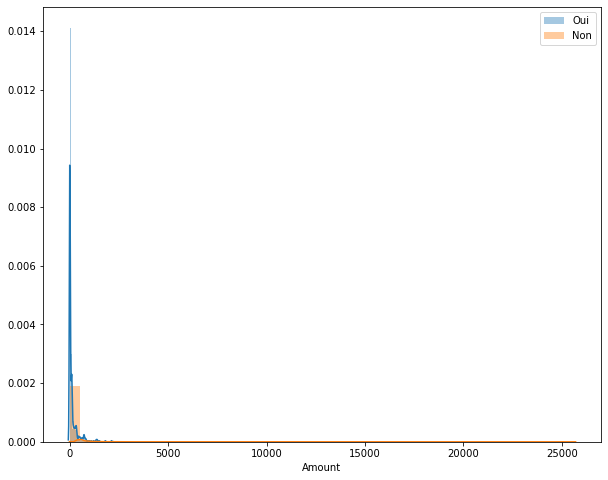

In [23]:
# Relation entre la variable cible et les variables exoplicatives
for col in numCols:
    plt.figure(figsize =(10,8))
    sns.distplot(Fraude[col], label='Oui')
    sns.distplot(Non_Fraude[col], label='Non')
    plt.legend()

On peut remarquer que certaines variables comme V4, V11, V15, V13... présentent des proportions de cartes frauduleuses assez importantes.

In [9]:
data.Class.value_counts()

non_fraudée    284315
fraudée           492
Name: Class, dtype: int64

In [10]:
# Test de Kruskal pour évaluer la corrélation entre les variables explicatives et la variable cible.
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in numCols:
    # Calculer les groupes de valeurs
    groups = [data[data['Class'] == 'non_fraudée'][var], data[data['Class'] == 'fraudée'][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

   Variable  Kruskal-Wallis       P-valeur
14      V14     1189.037432  1.471567e-260
4        V4     1132.020912  3.625871e-248
12      V12     1125.737230  8.415949e-247
11      V11     1030.194668  4.910549e-226
10      V10     1010.450247  9.611047e-222
3        V3     1000.787198  1.211038e-219
2        V2      742.576282  1.650425e-163
16      V16      710.201992  1.808159e-156
9        V9      697.811931  8.943658e-154
7        V7      664.638374  1.464223e-146
17      V17      559.815752  9.219324e-124
1        V1      512.580648  1.740774e-113
6        V6      420.178941   2.230990e-93
21      V21      357.756128   8.673310e-80
18      V18      346.345027   2.648948e-77
5        V5      258.851673   3.053698e-58
27      V27      228.279190   1.414583e-51
8        V8      146.839019   8.509863e-34
19      V19      144.777687   2.401952e-33
20      V20      132.560599   1.128101e-30
28      V28      118.723941   1.203679e-27
0      Time       38.932947   4.386151e-10
24      V24

# **Prétraitement**

In [11]:
# Suppression des lignes dupliquées
data = data.drop_duplicates()

## **Remplacement des valeurs aberrantes (outliers)**

In [12]:
#définition d'une fonction de suppression de valeurs aberrantes
def replace_outliers(df, numVar):
  Q1 = np.percentile(df[numVar], 25)
  Q3 = np.percentile(df[numVar], 75)
  IQR = Q3 - Q1
  min = Q1 - 1.5*IQR
  max = Q3 + 1.5*IQR
  #dataframeOut = dataframe.copy()
  df.loc[df[numVar] < min , numVar] = min 
  df.loc[df[numVar] > max, numVar] = max #

In [14]:
df = data.copy()

In [15]:
for col in numCols: 
    replace_outliers(df, col)

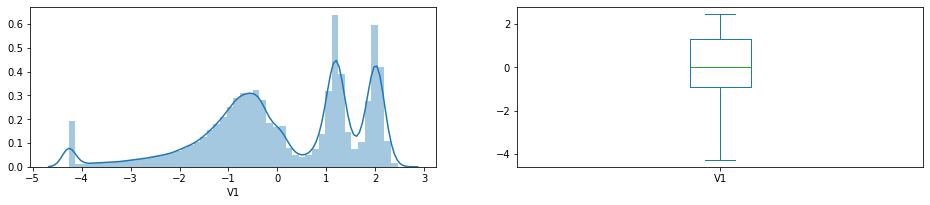

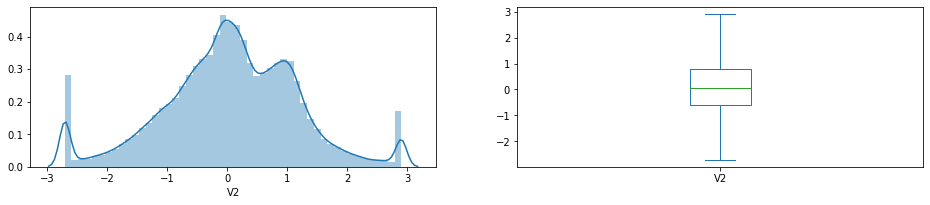

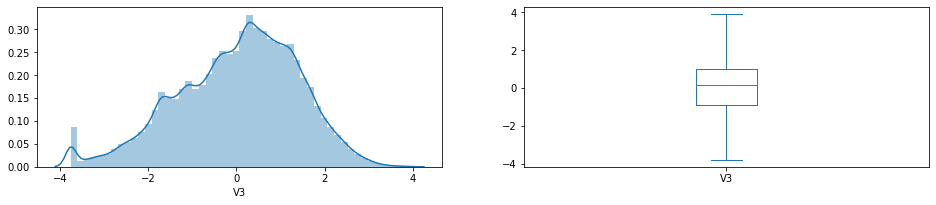

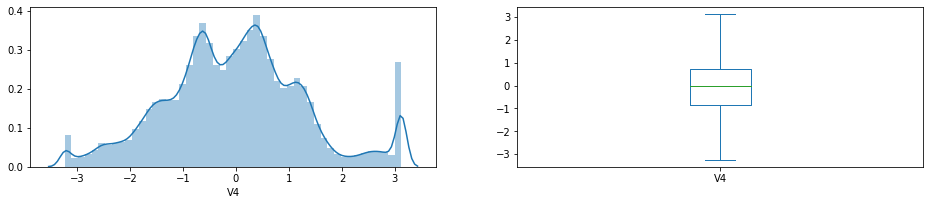

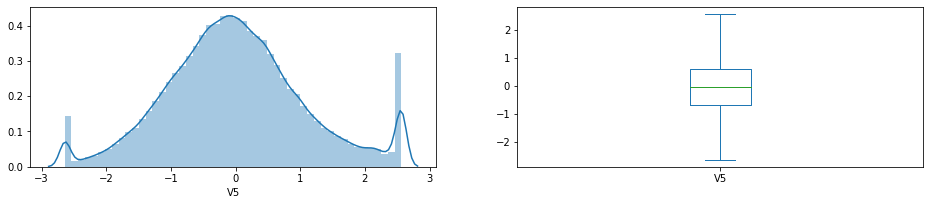

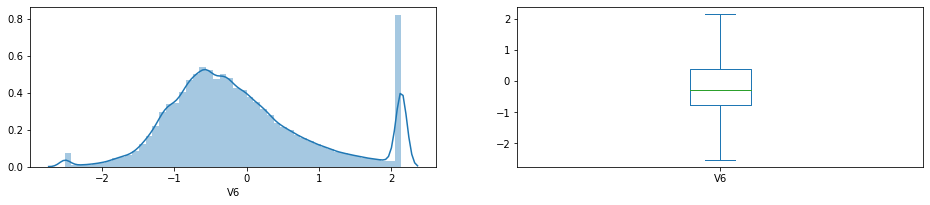

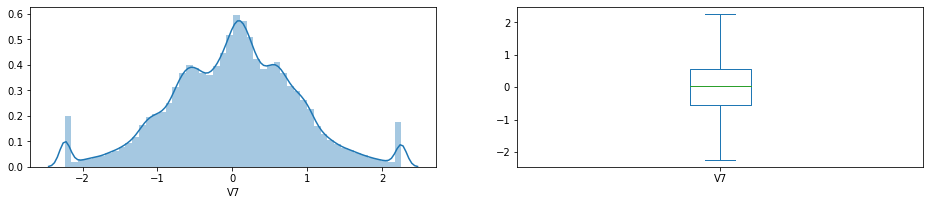

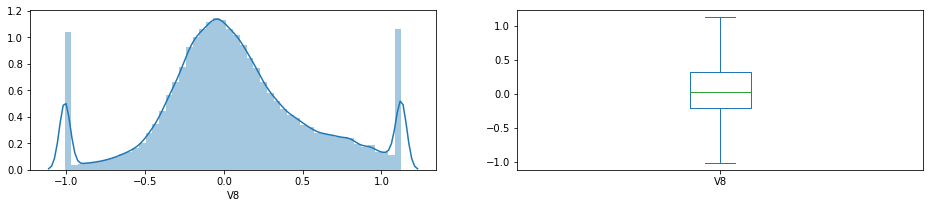

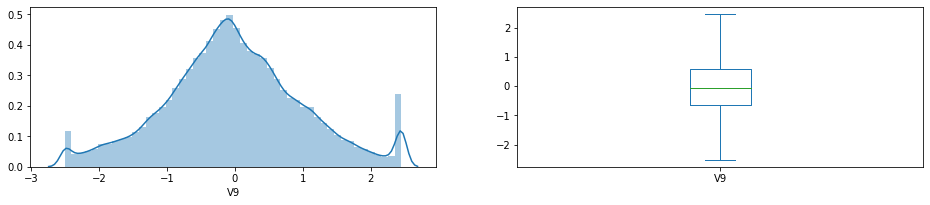

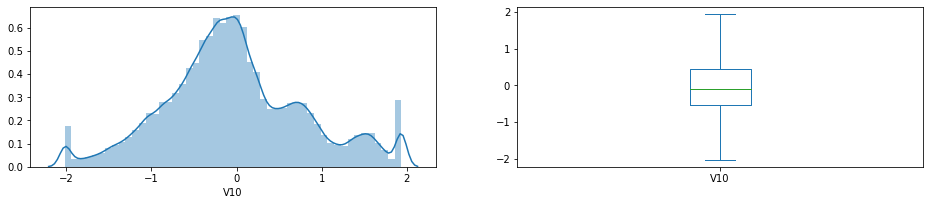

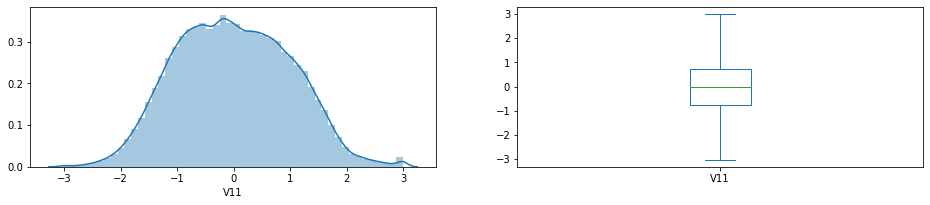

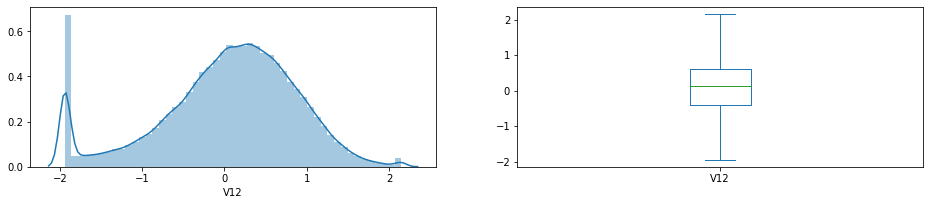

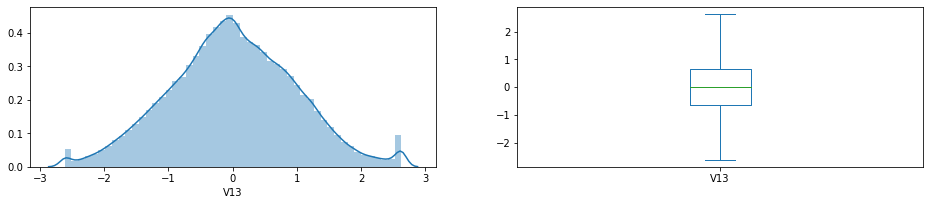

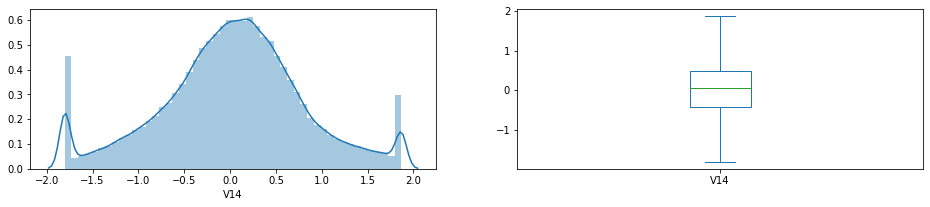

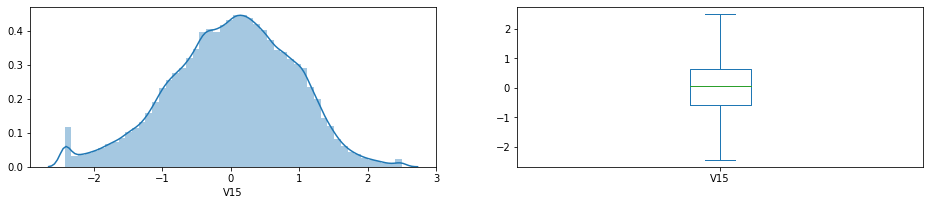

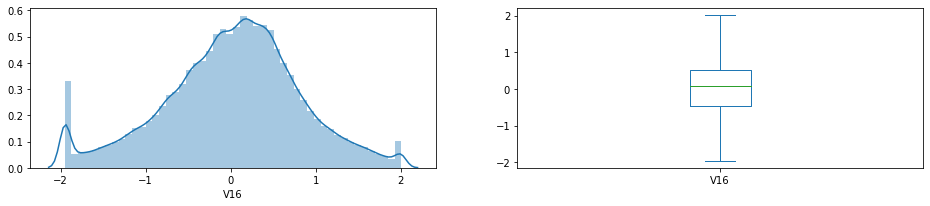

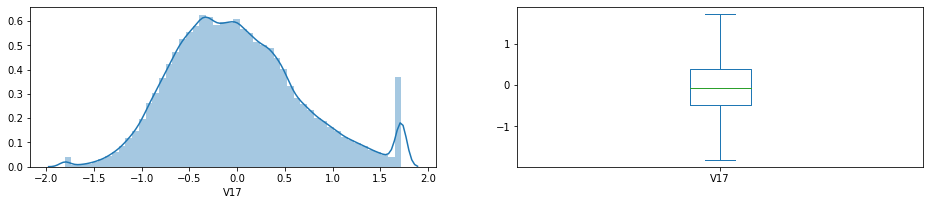

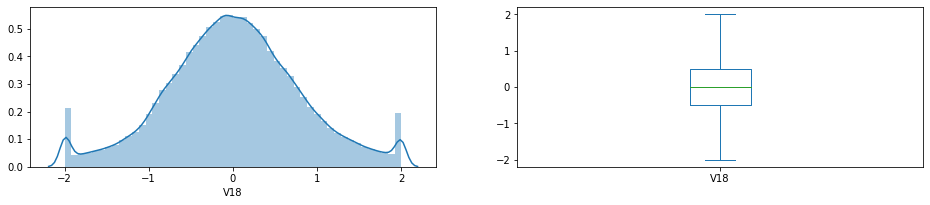

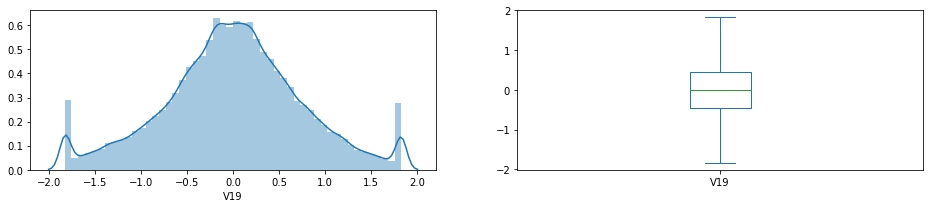

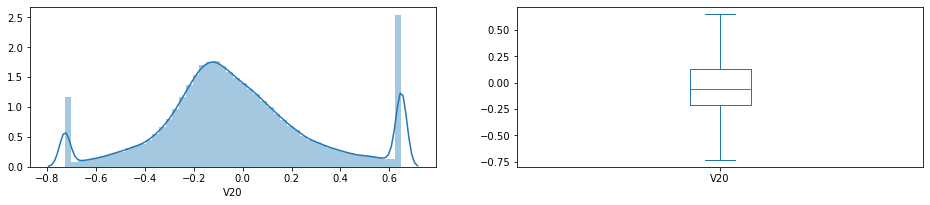

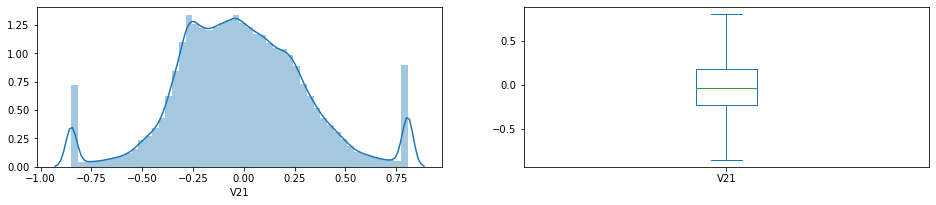

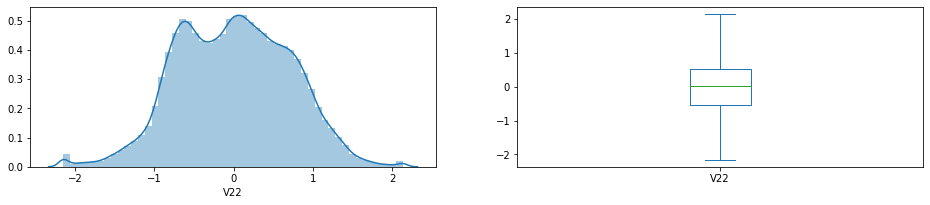

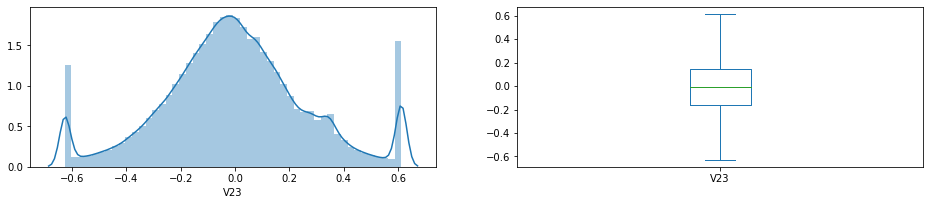

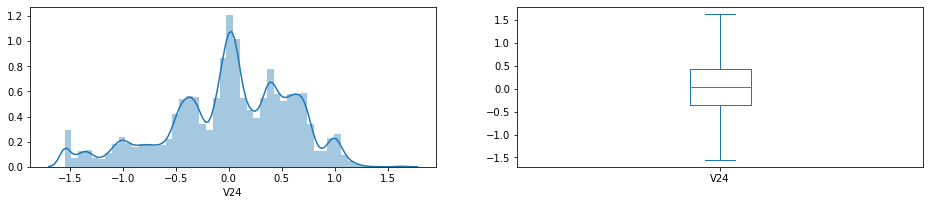

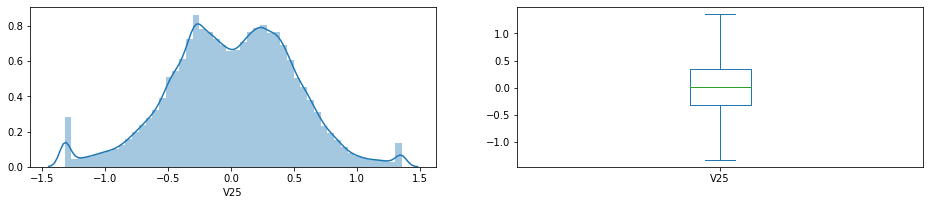

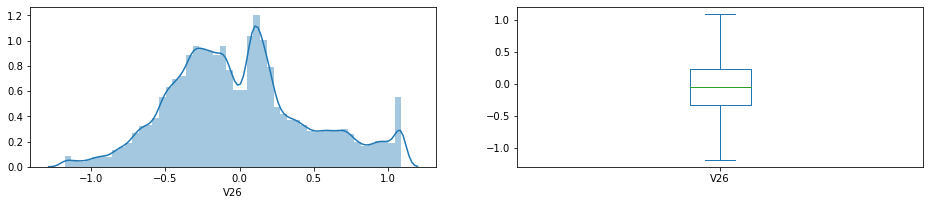

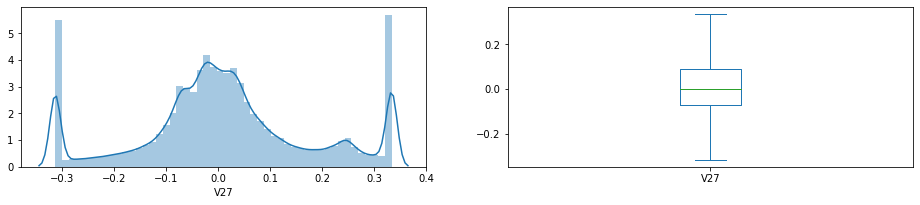

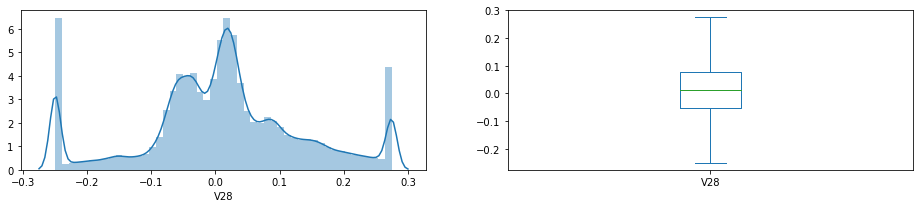

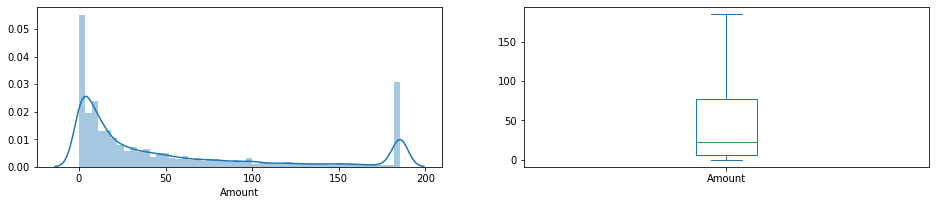

In [37]:
#Distribution des variables quantitatives pour vérifier les outliers
for col in numCols:
    plt.subplot(321)
    sns.distplot(df[col])

    plt.subplot(322)
    df[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

## **Encodage de la variable cible**

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,non_fraudée
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,non_fraudée
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,non_fraudée
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,non_fraudée
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,non_fraudée


In [17]:
df_col = pd.get_dummies(df.Class,drop_first= True)
df_col.head()

,non_fraudée
0,1
1,1
2,1
3,1
4,1


In [18]:
df_col.value_counts()

non_fraudée
1              283253
0                 473
dtype: int64

In [19]:
# Renommage de la variable cible
df_col.columns = ['Cible']

# Concaténation 
df_clean = pd.concat([df.drop("Class", axis = 1),df_col],axis = 1)

# Appercu
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cible
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,1


In [40]:
#séparation de la variable cible des variables explicatives
X = df_clean.drop("Cible" , axis =  1)
y = df_clean["Cible"]
print(X.shape)
print(y.shape)

(283726, 30)
(283726,)


## **Rééchantillonage SMOTE (Synthetic Minority Over-sampling Technique)**

**SMOTE** est une technique de rééchantillonnage spécifique pour gérer les ensembles de données déséquilibrés.<br>

**SMOTE** génère des échantillons synthétiques de la classe minoritaire en utilisant l'interpolation entre les échantillons existants. Pour chaque échantillon de la classe minoritaire, SMOTE sélectionne un certain nombre de ses voisins les plus proches appartenant à la même classe, puis génère de nouveaux échantillons en interpolant les attributs de l'échantillon original et de ses voisins.<br>

**Avantages**
-Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.<br>
-Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.<br>
-Génère des échantillons synthétiques plutôt que de dupliquer les échantillons existants, ce qui peut aider à éviter le surapprentissage et permettre une meilleure généralisation.<br>
**Inconvénients**
-Peut créer des échantillons synthétiques qui ne représentent pas la réalité, ce qui peut entraîner un modèle moins robuste ou moins généralisable.<br>
-Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.<br>


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)
print(X_sm.shape)
print(y_sm.shape)

In [ ]:
#Proportion des modalités de la variable sexe
y_sm.value_counts()

## **Division de la base en train/test (80 - 20)**

In [22]:
#importation de la fonction de découpage (train_test_split)
from sklearn.model_selection import train_test_split 

In [23]:
#découpage 80 - 20
X_train , X_test, y_train, y_test = train_test_split(X_sm , y_sm , test_size = 0.2 , random_state = 42 )

In [24]:
print("Dimensions X_train :", X_train.shape)
print("Dimensions y_train :", y_train.shape)
print("Dimensions X_test :", X_test.shape)
print("Dimensions y_test :", y_test.shape)

Dimensions X_train : (226980, 30)
Dimensions y_train : (226980,)
Dimensions X_test : (56746, 30)
Dimensions y_test : (56746,)


In [25]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.145527,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.611926,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,185.375
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,2.565290,2.145527,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.320
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.990
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.313414,-0.103404,6.300
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.807941,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.990


## **Normalisation des variables Amount et Time**
En effet, toutes les autres variables ont subi un ACP sauf Amount et Time. Celà dit qu'on peut les normaliser. 

In [26]:
#importation de l'algorithme
from sklearn.preprocessing import StandardScaler
#instanciation
standardScaler = StandardScaler()

In [29]:
cols_scaled = df[['Amount','Time']].columns.tolist()

cols_scaled

['Amount', 'Time']

In [30]:
## Données d'entraînement
#copie du dataframe précédent
X_trainScaledStandard = X_train.copy()
#standard scaler
X_trainScaledStandard[cols_scaled] = standardScaler.fit_transform(X_train[cols_scaled])
#apperçu
X_trainScaledStandard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-0.777172,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.145527,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.611926,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,2.155728
265736,1.415731,-0.059936,0.582525,-1.369698,-1.100370,2.565290,2.145527,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.299877
42801,-1.127146,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.515149
172689,0.556188,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.313414,-0.103404,-0.736235
179949,0.621563,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.807941,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.676644


In [31]:
## Données de test
#copie du dataframe précédent
X_testScaledStandard = X_test.copy()
#standard scaler
X_testScaledStandard[cols_scaled] = standardScaler.transform(X_test[cols_scaled])
#apperçu
X_testScaledStandard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,-0.538790,1.054379,-0.764756,0.160168,0.665587,1.113466,2.145527,-1.536609,1.127502,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,0.073175
134356,-0.295101,-4.263980,2.901188,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.456273,...,0.650222,-0.850053,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.333982,-0.249459,-0.679389
42637,-1.128599,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.090798,-0.313414,-0.248822,-0.093810
882,-1.981656,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,-0.780162
263275,1.391412,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,-0.792112


# **Modélisation**

## **Entrainement standard**

In [32]:
#importation du f1_score
from sklearn.metrics import f1_score
#importation du la fonction time()
from time import time

In [33]:
#Définition de fonction 
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train_scaled , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : f1_score(y_train , y_pred_train) ,
                   "f1_test_score" : f1_score(y_test , y_pred_test)})
  return pd.DataFrame(scores)

In [34]:
  #importation des algorithmes
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier

In [1]:
#liste de modeles
ModelsList = [RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier,
              DecisionTreeClassifier , KNeighborsClassifier, LogisticRegression , SVC]

NameError: name 'RandomForestClassifier' is not defined

In [44]:
#premier essai de modélisation
scores = modelisation(ModelsList ,X_trainScaledStandard, y_train , X_testScaledStandard , y_test)
scores.set_index("Modeles" , inplace = True)
scores

On peut remarquer que le modèle LogisticRegression est le meilleur modèle. 

In [61]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,f1_train_score,f1_test_score
Modeles,,,
RandomForestClassifier,0.461145,1.000000,0.999735
AdaBoostClassifier,0.204976,0.999609,0.999621
GradientBoostingClassifier,1.000000,0.999129,0.999224
DecisionTreeClassifier,0.034512,1.000000,0.999550
KNeighborsClassifier,0.021185,0.999748,0.999718
LogisticRegression,0.013838,0.999709,0.999726
SVC,0.050272,0.999506,0.999568


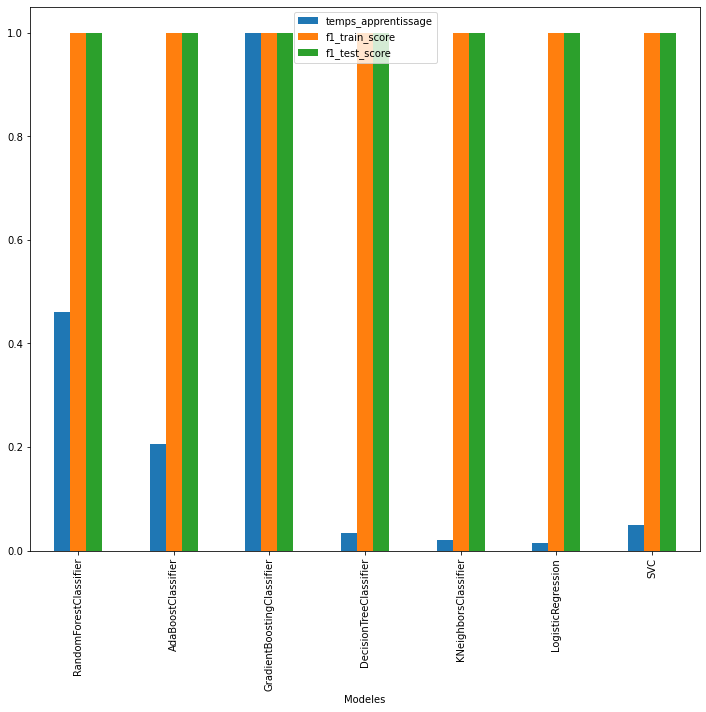

In [69]:
#visualisation 
scores.plot.bar(figsize=(12,10))
plt.show()

## **Entrainement par validation croisée**

In [41]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [42]:
#définition du nombre de split
cv = StratifiedKFold(n_splits = 5)

In [43]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train_scaled , y_train):
  scores = []
  for mod in ModelsList :
    try : 
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train_scaled , y = y_train , cv = cv , 
               scoring = 'f1', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin
    scores.append({"Modeles" : type(model).__name__ , 
                   "temps_apprentissage" : fin - debut,
                   "f1_train_score" : score['train_score'].mean() ,
                   "f1_test_score" : score['test_score'].mean()})
  return pd.DataFrame(scores)

In [ ]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_trainScaledStandard, y_train)
scores.set_index("Modeles" , inplace = True)
scores

In [ ]:
#visualisation 
scores.plot.bar()
plt.show()

## **Optimisation de l'algorithme de la regression**

Il n'est pas vraiment utile d'optimiser le modèle car ayant une performance de 99%. 
Cependant, on peut faire l'optimisation en guise d'exemple pour un prochain projet présentant des performances moins des 99%. 

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Sélection d'hyperparamètres
tuned_parameters = [{'penalty': ['l1','l2'],'C':np.logspace(-3,3,7), 'solver': ['newton-cg','lbfgs','liblinear']}]

In [77]:
model_grid = GridSearchCV(estimator=LogisticRegression(),param_grid=tuned_parameters, scoring ='f1',cv =3)
model_grid.fit(X_trainScaledStandard , y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='f1')

In [78]:
print("meilleur score:",model_grid.best_score_)
print("meilleurs parametres:",model_grid.best_params_)

meilleur score: 0.9997065503536459
meilleurs parametres: {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [80]:
best_model = LogisticRegression(C =10, penalty='l2', solver = 'lbfgs')
best_model.fit(X_trainScaledStandard , y_train)
pred_best = best_model.predict(X_testScaledStandard)

In [83]:
# Calcul de la précision
print("Précision:",precision_score(y_test, pred_best)*100)

# Calcul du recall
print("Recall:",recall_score(y_test, pred_best)*100)

# Calcul du F1-Score
print("F1-Score:",f1_score(y_test, pred_best)*100)

Précision: 99.95588806154497
Recall: 99.98764473312623
F1-Score: 99.9717638754081


Area Under Curve : 0.8610493347767423


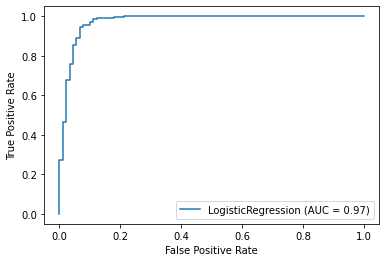

In [84]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(best_model,X_testScaledStandard,y_test) # Coube ROC

#predictions_prob = best_model.predict(X_test) # La prediction en probabilite
auc = roc_auc_score(y_test, pred_best) # oubien auc = roc_auc_score(y_test, predictions_prob)

print("Area Under Curve :", auc)

## **Enregistrement du modèle**


In [85]:
import joblib

In [86]:
# Enregistrement de notre modèle
joblib.dump(value=best_model, filename ='Detection de cartes frauduleuses.pkl')

['Detection de cartes frauduleuses.pkl']

In [87]:
## Chargement du modèle pour de nouvelles prédictions en cas
load_model = joblib.load(filename ='Detection de cartes frauduleuses.pkl')